# Quick start

Welcome to the **Quick start** guide! This should help you get started using `welly`.

First some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import welly
welly.__version__

'0.4.10.dev49+g6b014a6.d20220213'

## Create a project from LAS

Use the `read_las()` function to load a well by passing a single filename, a POSIX-style path with wildcards (e.g. `'file_*.las'`) or URL as a `str`.

This creates a project containing one (or more, depending on the wildcard) wells.

In [2]:
project = welly.read_las('https://geocomp.s3.amazonaws.com/data/P-129.LAS')

project

0it [00:00, ?it/s]Only engine='normal' can read wrapped files
1it [00:01,  1.84s/it]


Project(1 wells: Long = 63* 45'24.460  W)

Clearly there are some issues with this well. Have a look at the [Well object docs](Wells.ipynb) to see how to fix them.

You can index into a project to get at a single well.

In [3]:
well = project[0]

well

Well(uwi: 'Long = 63* 45'24.460  W', name: 'Kennetcook #2', 24 curves: ['CALI', 'HCAL', 'PEF', 'DT', 'DTS', 'DPHI_SAN', 'DPHI_LIM', 'DPHI_DOL', 'NPHI_SAN', 'NPHI_LIM', 'NPHI_DOL', 'RLA5', 'RLA3', 'RLA4', 'RLA1', 'RLA2', 'RXOZ', 'RXO_HRLT', 'RT_HRLT', 'RM_HRLT', 'DRHO', 'RHOB', 'GR', 'SP'])

The well's `header` contains the well information from the **WELL** part of the file.

**PLEASE NOTE** The `header` attribute is under active development and will change in the next release of `welly`. We will make it more natural to find basic information about the well, without having to know how to read an LAS file.

In [4]:
well.header

original_mnemonic mnemonic unit          value  \
0                VERS     VERS                 2.0   
1                WRAP     WRAP                 YES   
2                STRT     STRT    M         1.0668   
3                STOP     STOP    M      1939.1376   
4                STEP     STEP    M         0.1524   
..                ...      ...  ...            ...   
137               TLI      TLI    M          280.0   
138              UWID     UWID                       
139                WN       WN       Kennetcook #2   
140               EPD      EPD    M      90.300003   
141                    UNKNOWN                       

                                                 descr    section  
0                                                         Version  
1                                                         Version  
2                                          START DEPTH       Well  
3                                           STOP DEPTH       Well  
4                                                 STEP       Well  
..                                                 ...        ...  
137                                   Top Log Interval  Parameter  
138                  Unique Well Identification Number  Parameter  
139                                          Well Name  Parameter  
140  Elevation of Permanent Datum above Mean Sea Level  Parameter  
141                                                         Other  

[142 rows x 6 columns]

The well's `location` contains the location info from **PARAMS**:

In [5]:
well.location

Location({'position': None, 'crs': CRS({}), 'location': 'Lat = 45* 12\' 34.237" N', 'country': 'CA', 'province': 'Nova Scotia', 'latitude': '', 'longitude': '', 'datum': '', 'section': '45.20 Deg N', 'range': 'PD 176', 'township': '63.75 Deg W', 'ekb': 94.8, 'egl': 90.3, 'gl': 90.3, 'tdd': 1935.0, 'tdl': 1935.0, 'td': None, 'deviation': None})

## Basic plots

Welly produces simple `matplotlib` plots. You can add your own Matplotlib code to build on them.

Let's plot some important logs. We can put two logs in the same track, as shown, and add depth tracks:

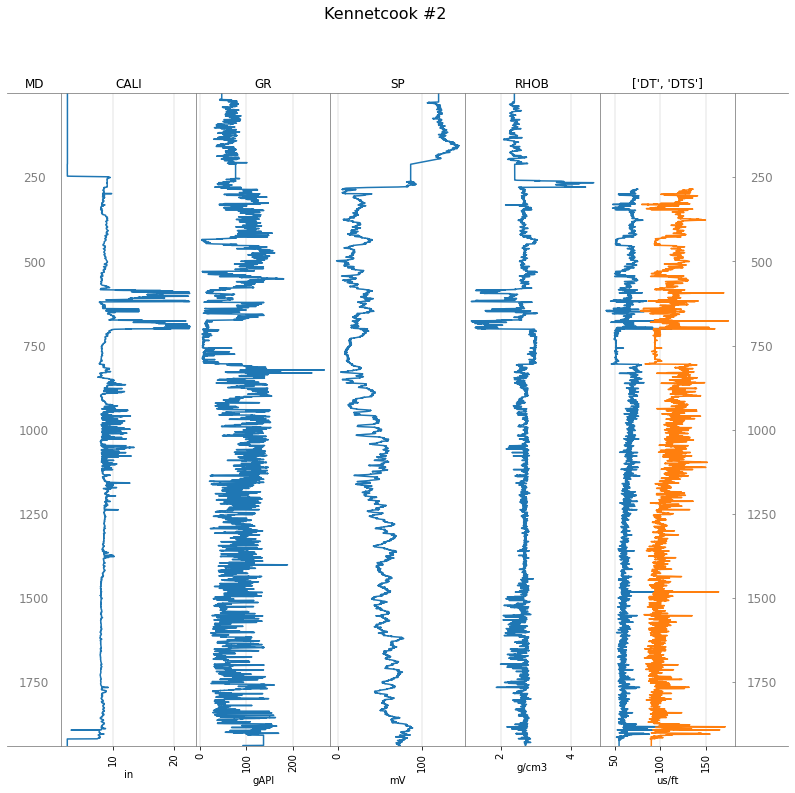

In [6]:
tracks = ['MD', 'CALI', 'GR', 'SP', 'RHOB', ['DT', 'DTS'], 'MD']

well.plot(tracks=tracks)

## Curve data

The well curves are stored in `well.data`, which is a dictionary mapping mnemonic to `welly.Curve` object:

In [7]:
well.data

{'CALI': Curve(mnemonic=CALI, units=in, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'HCAL': Curve(mnemonic=HCAL, units=in, start=1.0668, stop=1939.1376, step=0.1524, count=[2139]),
 'PEF': Curve(mnemonic=PEF, units=, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DT': Curve(mnemonic=DT, units=us/ft, start=1.0668, stop=1939.1376, step=0.1524, count=[10850]),
 'DTS': Curve(mnemonic=DTS, units=us/ft, start=1.0668, stop=1939.1376, step=0.1524, count=[10850]),
 'DPHI_SAN': Curve(mnemonic=DPHI_SAN, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DPHI_LIM': Curve(mnemonic=DPHI_LIM, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DPHI_DOL': Curve(mnemonic=DPHI_DOL, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'NPHI_SAN': Curve(mnemonic=NPHI_SAN, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'NPHI_LIM': Curve(mnemonic=NPHI_LIM, units=m3/m3, start=1.0668, stop=

Let's assign `gr` to the gamma-ray log so we can inspect it more easily:

In [8]:
gr = well.data['GR']

gr

Curve(mnemonic=GR, units=gAPI, start=1.0668, stop=1939.1376, step=0.1524, count=[12718])

It's often helpful to make a quick plot:

<AxesSubplot:title={'center':'GR'}, xlabel='gAPI'>

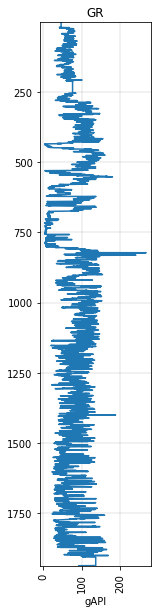

In [9]:
gr.plot()

## Curve data as a `pandas.DataFrame`

The `df` attribute (attributes are like ordinary variables; they do not have parentheses after them) of a single curve is a dataframe:

In [10]:
gr.df

GR
DEPT                  
1.0668     46.69865036
1.2192     46.69865036
1.3716     46.69865036
1.5240     46.69865036
1.6764     46.69865036
...                ...
1938.5280  92.24622345
1938.6804  92.24622345
1938.8328  92.24622345
1938.9852  92.24622345
1939.1376  92.24622345

[12718 rows x 1 columns]

And you can get at all of the well data in a similar way, except that this is a **method** not an attribute.

In [11]:
well.df()

CALI          HCAL           PEF  DT  DTS      DPHI_SAN  \
DEPT                                                                         
1.0668     2.4438154697  4.3912849426  3.5864000320 NaN  NaN  0.1574800014   
1.2192     2.4438154697  4.3912849426  3.5864000320 NaN  NaN  0.1574800014   
1.3716     2.4438154697  4.3912849426  3.5864000320 NaN  NaN  0.1574800014   
1.5240     2.4438154697  4.3912849426  3.5864000320 NaN  NaN  0.1574800014   
1.6764     2.4438154697  4.3912849426  3.5864000320 NaN  NaN  0.1574800014   
...                 ...           ...           ...  ..  ...           ...   
1938.5280  2.4202680588           NaN  2.2369799614 NaN  NaN  0.5464199781   
1938.6804  2.4202680588           NaN  2.2369799614 NaN  NaN  0.5464199781   
1938.8328  2.4202680588           NaN  2.2369799614 NaN  NaN  0.5464199781   
1938.9852  2.4202680588           NaN  2.2369799614 NaN  NaN  0.5464199781   
1939.1376  2.4202680588           NaN  2.2369799614 NaN  NaN  0.5464199781   

                 DPHI_LIM        DPHI_DOL      NPHI_SAN      NPHI_LIM  ...  \
DEPT                                                                   ...   
1.0668       0.1984400004    0.2590999901  0.4650999904  0.3364700079  ...   
1.2192       0.1984400004    0.2590999901  0.4650999904  0.3364700079  ...   
1.3716       0.1984400004    0.2590999901  0.4650999904  0.3364700079  ...   
1.5240       0.1984400004    0.2590999901  0.4650999904  0.3364700079  ...   
1.6764       0.1984400004    0.2590999901  0.4650999904  0.3364700079  ...   
...                   ...             ...           ...           ...  ...   
1938.5280  585.9415283200  541.6757202100  0.1283400059  0.0841699988  ...   
1938.6804  585.9415283200  541.6757202100  0.1283400059  0.0841699988  ...   
1938.8328  585.9415283200  541.6757202100  0.1283400059  0.0841699988  ...   
1938.9852  585.9415283200  541.6757202100  0.1283400059  0.0841699988  ...   
1939.1376  585.9415283200  541.6757202100  0.1283400059  0.0841699988  ...   

                     RLA1            RLA2          RXOZ      RXO_HRLT  \
DEPT                                                                    
1.0668       0.0320999995    0.0279399995  0.0576100014  0.0255800001   
1.2192       0.0320999995    0.0279399995  0.0576100014  0.0255800001   
1.3716       0.0320999995    0.0279399995  0.0576100014  0.0255800001   
1.5240       0.0320999995    0.0279399995  0.0576100014  0.0255800001   
1.6764       0.0320999995    0.0279399995  0.0576100014  0.0255800001   
...                   ...             ...           ...           ...   
1938.5280  274.0264892600  663.1040649400  7.1023502350           NaN   
1938.6804  274.0264892600  663.1040649400  7.1022100449           NaN   
1938.8328  274.0264892600  663.1040649400  7.0968699455           NaN   
1938.9852  274.0264892600  663.1040649400  7.0391001701           NaN   
1939.1376  274.0264892600  663.1040649400  7.0019497871           NaN   

                RT_HRLT       RM_HRLT          DRHO          RHOB  \
DEPT                                                                
1.0668     0.0255800001  0.0550099984  0.1942329407  2.3901498318   
1.2192     0.0255800001  0.0550099984  0.1942329407  2.3901498318   
1.3716     0.0255800001  0.0550099984  0.1942329407  2.3901498318   
1.5240     0.0255800001  0.0550099984  0.1942329407  2.3901498318   
1.6764     0.0255800001  0.0550099984  0.1942329407  2.3901498318   
...                 ...           ...           ...           ...   
1938.5280  7.3863301277  0.0272899996  0.0613951497           NaN   
1938.6804  7.3860998154  0.0272899996  0.0613951497           NaN   
1938.8328  7.3806500435  0.0272899996  0.0613951497           NaN   
1938.9852  7.3211698532  0.0272899996  0.0613951497           NaN   
1939.1376  7.1535902023  0.0272899996  0.0613951497           NaN   

                    GR        SP  
DEPT                              
1.0668     46.69865036  120.1250  
1.2192     46.69865036  120.1250  
1

 It has to be a method because we can pass in extra options like aliases.

## Curve aliases

We can make a dictionary mapping alias names (what we want to call curves) to a list of mnemonics (what they are actually called). The list of mnemonics is *ordered*, and this order expresses your preference. So, for example, in the alias dictionary below, the **GR** log will be used in preference to the **GAM** log.

In [12]:
alias = {
    "Gamma": ["GR", "GAM", "GRC", "SGR", "NGT"],
    "Density": ["RHOZ", "RHOB", "DEN", "RHOZ"],
    "Sonic": ["DT", "AC", "DTP", "DT4P"],
    "Caliper": ["CAL", "CALI", "CALS", "C1"],
    'Porosity SS': ['NPSS', 'DPSS'],
}

Lots of methods in `welly` take an alias. Welly will use the alias dictionary to decide what to show. 

Here, the `keys` argument narrows down the columns to include in the dataframe.

In [13]:
well.df(keys=['Gamma', 'Density', 'Sonic', 'DTS'], alias=alias)

Gamma       Density  Sonic  DTS
DEPT                                            
1.0668     46.69865036  2.3901498318    NaN  NaN
1.2192     46.69865036  2.3901498318    NaN  NaN
1.3716     46.69865036  2.3901498318    NaN  NaN
1.5240     46.69865036  2.3901498318    NaN  NaN
1.6764     46.69865036  2.3901498318    NaN  NaN
...                ...           ...    ...  ...
1938.5280  92.24622345           NaN    NaN  NaN
1938.6804  92.24622345           NaN    NaN  NaN
1938.8328  92.24622345           NaN    NaN  NaN
1938.9852  92.24622345           NaN    NaN  NaN
1939.1376  92.24622345           NaN    NaN  NaN

[12718 rows x 4 columns]

There are a lot of NaNs there, but if we just wanted to see the middle of the well, we can pass in a `basis` to narrow it down (and even resample the data if we want).

Let's look at 1000 to 1500 m, resampled to 1 m sample interval:

In [14]:
basis = range(1000, 1501)

well.df(keys=['Gamma', 'Density', 'Sonic', 'DTS'], alias=alias, basis=basis)

Gamma       Density  Sonic  DTS
DEPT                                            
1.0668     46.69865036  2.3901498318    NaN  NaN
1.2192     46.69865036  2.3901498318    NaN  NaN
1.3716     46.69865036  2.3901498318    NaN  NaN
1.5240     46.69865036  2.3901498318    NaN  NaN
1.6764     46.69865036  2.3901498318    NaN  NaN
...                ...           ...    ...  ...
1938.5280  92.24622345           NaN    NaN  NaN
1938.6804  92.24622345           NaN    NaN  NaN
1938.8328  92.24622345           NaN    NaN  NaN
1938.9852  92.24622345           NaN    NaN  NaN
1939.1376  92.24622345           NaN    NaN  NaN

[12718 rows x 4 columns]

## Curve quality

We can check the quality of curves with a dictionary of tests. There are some predefined tests in the `welly.quality` module, but you can write your own functions and pass them in instead (the function should take a curve as its argument, and return `True` if the test passed).

In [15]:
import welly.quality as q

tests = {
    'Each': [
        q.no_flat,
        q.no_monotonic,
        q.no_gaps,
    ],
    'Gamma': [
        q.all_positive,
        q.all_below(450),
        q.check_units(['API', 'GAPI']),
    ],
    'DT': [
        q.all_positive,
    ],
    'Sonic': [
        q.all_between(1, 10000),  # 1333 to 5000 m/s
        q.no_spikes(10),          # 10 spikes allowed
    ],
}

In [16]:
passed = well.qc_data(tests, alias=alias)

This returns a dictionary of curves in which the values are dictionaries of **test name: test result** pairs.

In [17]:
passed

{'CALI': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'HCAL': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'PEF': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'DT': {'no_flat': True,
  'no_monotonic': True,
  'no_gaps': True,
  'all_positive': True,
  'all_between': True,
  'no_spikes': False},
 'DTS': {'no_flat': True, 'no_monotonic': True, 'no_gaps': True},
 'DPHI_SAN': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'DPHI_LIM': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'DPHI_DOL': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'NPHI_SAN': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'NPHI_LIM': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'NPHI_DOL': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'RLA5': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'RLA3': {'no_flat': False, 'no_monotonic': False, 'no_gaps': True},
 'RLA4': {'no_

There's also an HTML table for rendering in Notebooks:

In [18]:
from IPython.display import HTML

html = well.qc_table_html(tests, alias=alias)
HTML(html)

## Add a striplog

In principle, Welly can hold data from anywhere. Let's add data from another source. [Striplog](https://code.agilescientific.com/striplog) can create a geological log from an image or a CSV. Let's try it:

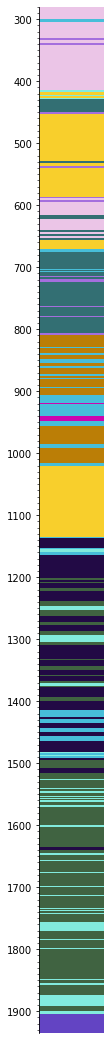

In [19]:
from striplog import Legend, Striplog

legend = Legend.builtin('NSDOE')
strip = Striplog.from_image('https://geocomp.s3.amazonaws.com/data/P-129_280_1935.png', 280, 1935, legend=legend)
strip.plot()

Add this to the well data:

In [20]:
well.data['strip'] = strip

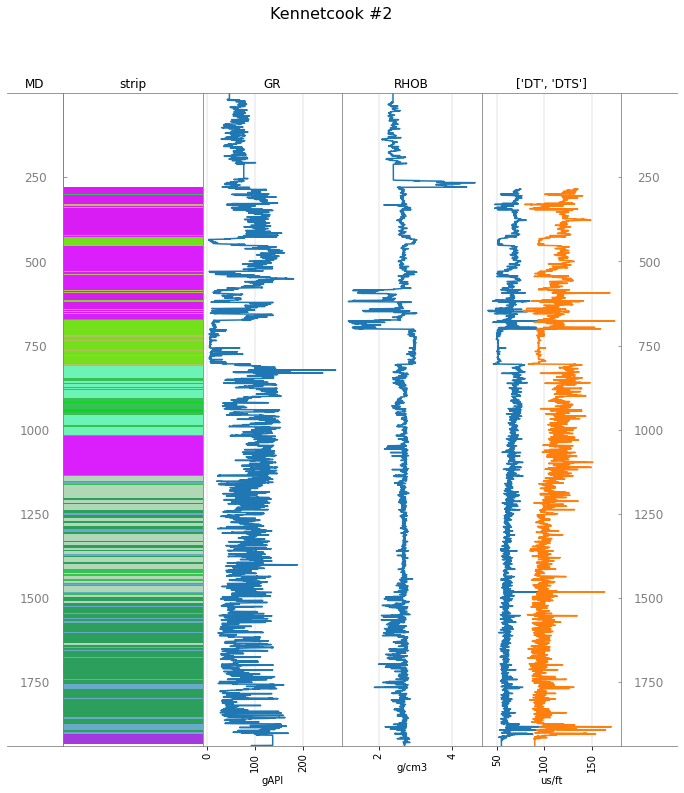

In [21]:
tracks = ['MD', 'strip', 'GR', 'RHOB', ['DT', 'DTS'], 'MD']

well.plot(tracks=tracks)

## Write a LAS file

At any point, you can write out a new LAS file.

Let's write a new file with only the DT and DTS logs, and a different NULL value to the original:

In [22]:
well.to_las('out.las', keys=['DT', 'DTS'], null_value=-111.111)

You can perform a shell command in Jupyter Notebooks by putting a `!` before the command. So on Linux, here's how we can check the new file exists:

In [23]:
!ls -l out.las

-rw-rw-r-- 1 matt matt 434247 Feb 13 14:22 out.las


In [24]:
!head -12 out.las

~Version ---------------------------------------------------
VERS.   2.0 : CWLS log ASCII Standard -VERSION 2.0
WRAP.    NO : One line per depth step
DLM . SPACE : Column Data Section Delimiter
~Well ------------------------------------------------------
STRT  .m                    1.06680 : START DEPTH
STOP  .m                 1939.13760 : STOP DEPTH
STEP  .m                    0.15240 : STEP
NULL  .                    -111.111 : NULL VALUE
COMP  . Elmworth Energy Corporation : COMPANY
WELL  .               Kennetcook #2 : WELL
FLD   .               Windsor Block : FIELD


---

&copy; 2022 Agile Scientific, CC BY